In [0]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os

from fastai.vision import *

plt.ion()

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from pathlib import Path
#PATH = Path('../birds_train_val')
data = ImageDataBunch.from_folder('/content/drive/My Drive/PROJECT_BIRD/birds_train_val/', train = 'train', valid = 'valid', ds_tfms=get_transforms(), bs=16, size=224)

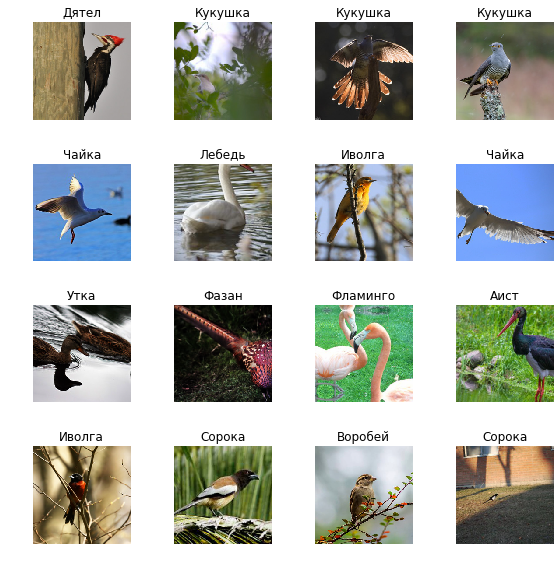

In [6]:
data.show_batch(rows=4, figsize=(8,8))

In [8]:
# так как используем трансфр лнгнг, нормализуем данные по стандартам имажнета
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (25399 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Бекас,Бекас,Бекас,Бекас,Бекас
Path: /content/drive/My Drive/PROJECT_BIRD/birds_train_val;

Valid: LabelList (5730 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Коллибри,Коллибри,Коллибри,Коллибри,Коллибри
Path: /content/drive/My Drive/PROJECT_BIRD/birds_train_val;

Test: None

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [9]:
# смотрим классы
print(data.classes)
len(data.classes),data.c

['Аист', 'Бекас', 'Воробей', 'Ворон', 'Голубь', 'Дятел', 'Журавль', 'Иволга', 'Коллибри', 'Кукушка', 'Лебедь', 'Орел', 'Пеликан', 'Синица', 'Сова', 'Сокол', 'Сорока', 'Трясогузка', 'Утка', 'Фазан', 'Фламинго', 'Цапля', 'Чайка']


(23, 23)

In [10]:
model = cnn_learner(data, models.vgg16_bn, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 553507836/553507836 [00:05<00:00, 103943815.53it/s]


In [12]:
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.636856,0.374689,0.884468,2:51:25
1,0.558623,0.309938,0.900349,11:02
2,0.447958,0.252303,0.920593,11:07
3,0.449735,0.223868,0.932984,11:06
4,0.370432,0.215944,0.935079,10:58


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


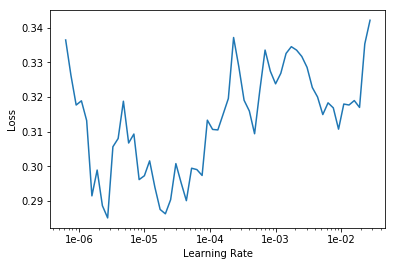

In [26]:
model.lr_find()
model.recorder.plot()

In [27]:
model.fit_one_cycle(5, 0.00005)

epoch,train_loss,valid_loss,accuracy,time
0,0.339255,0.207276,0.937522,10:58
1,0.352284,0.206793,0.938045,11:00
2,0.312299,0.208080,0.938743,11:00
3,0.333677,0.207917,0.938569,10:49
4,0.311927,0.212018,0.937522,10:31


In [0]:
model.export()

In [0]:
interp = ClassificationInterpretation.from_learner(model)

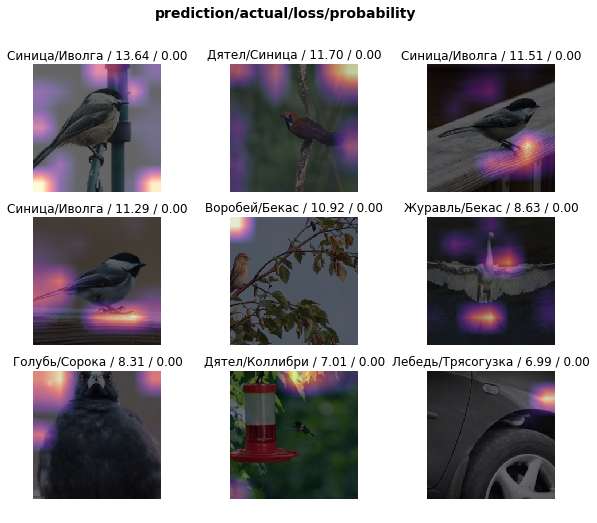

In [30]:
interp.plot_top_losses(9, figsize=(10,8))

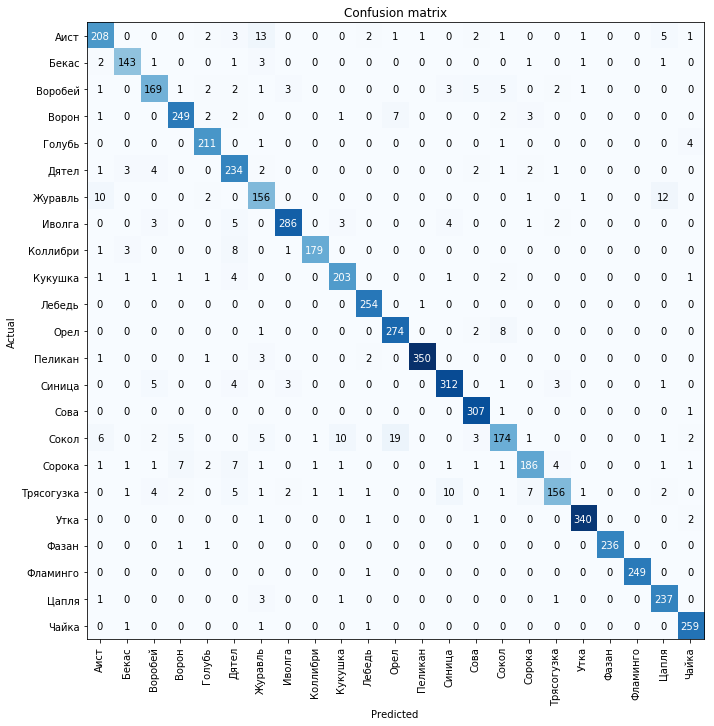

In [31]:

interp.plot_confusion_matrix(figsize=(10,10))